# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Part 1a: Are there any missing values in the dataset?
- Part 1b: How are the predictor variables related to the outcome variable?
- Part 1c: What is the correlation between the predictor variables?
- Part 1d: What is the distribution of each predictor variable?
- Part 1e: Predictor Variable Analysis:
    - Are there any outliers in the predictor variables?
    - How are the predictor variables related to each other?
    - Is there any interaction effect between the predictor variables?
    - Are there any differences in the predictor variables between males and females (if gender information is available)?
- Part 1f: Specific Averages:
    - What is the average age of the individuals in the dataset?
    - What is the average glucose level for individuals with diabetes and without diabetes?
    - What is the average BMI for individuals with diabetes and without diabetes?
- Part 1g: How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

## Part 1 Preliminary Stage: Imports

In [46]:
# Imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


# Csv
diabetes_df = pd.read_csv(r'../data/diabetes.csv')

## Part 1 Preliminary Stage: Model Description

This project will employ a logistic regression model where the assumptions for this type of model are:

    Source: https://data.compass.lighthouselabs.ca/p/7/days/w05d3/activities/2297

    1. Data should be independent and random (each random variable has the same probability distribution).

    2. The response variable y does not need to be normally distributed, but the distribution is from an exponential family (e.g. binomial, Poisson, multinomial, normal)

    3. The original response variable need not have a linear relationship with the independent variables, but the transformed response variable (through the link function) is linearly dependent on the independent variables



 ## Part 1a: Are there any missing values in the dataset?

In [47]:
diabetes_df.shape
# Result: 768 records, 9 attributes

diabetes_df.dtypes
# Result: All but BMI and PedigreeFunction are Integers

diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
# filter dataframe for zero values
diabetes_df_BMI_0 = diabetes_df[diabetes_df['BMI'] == 0]
diabetes_df_BP_0 = diabetes_df[diabetes_df['BloodPressure'] == 0]
diabetes_df_ST_0 = diabetes_df[diabetes_df['SkinThickness'] == 0]

# Print the counts
print(f"There are {len(diabetes_df_BMI_0)} records containing 0 BMI")
print(f"There are {len(diabetes_df_BP_0)} records containing 0 BloodPressure")
print(f"There are {len(diabetes_df_ST_0)} records containing 0 SkinThickness")



There are 11 records containing 0 BMI
There are 35 records containing 0 BloodPressure
There are 227 records containing 0 SkinThickness


### Part 1a Answer
    No nulls, but there are values of zero for BloodPresure, Skin Thickness, and BMI that must be addressed

## Part 1b: How are the predictor variables related to the outcome variable?

#### Source 1: https://www.niddk.nih.gov/health-information/diabetes/overview

__Outcome__: Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high.  The most common types of diabetes are type 1, type 2, and gestational diabetes.

__Gluscose__: The main sugar found in your blood and your body's primary source of energy. Also called blood sugar.  Pre-diabetes means your blood glucose levels are higher than normal but not high enough to be diagnosed as diabetes. Pre-diabetes usually occurs in people who already have some insulin resistance or whose beta cells in the pancreas aren’t making enough insulin to keep blood glucose in the normal range. Without enough insulin, extra glucose stays in your bloodstream rather than entering your cells. Over time, you could develop type 2 diabetes.

__Insulin__: A hormone made by your pancreas that helps your body use glucose (blood sugar) for energy. Insulin helps to control blood glucose levels.  If you have type 1 diabetes, your body makes little or no insulin.

__Pregnancy__: Gestational diabetes is a type of diabetes that occurs only during pregnancy.  During pregnancy, your body makes special hormones and goes through other changes, such as weight gain. Because of these changes, your body’s cells don’t use insulin well, a condition called insulin resistance.  Being overweight or having obesity is linked to gestational diabetes. Women who are overweight or have obesity may already have insulin resistance when they become pregnant. Gaining too much weight during pregnancy may also be a factor. 

__BMI__: Risk factor for type 2 diabetes - overweight or have obesity.  Most (difference may come down to race, which is not measured in dataset) adults with a BMI of 25 or higher are overweight and have a higher risk of developing type 2 diabetes.  BMI is calculated differently for 19 and younger, but the youngest in our dataset is 21 years old.  BMI cannot distinguish between fat and muscle, so the terms overweight and obese over BMI 25 is not a hard rule.

__Age__: Risk factor for type 2 diabetes - are age 35 or older.


#### Source 2: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8306487

__Pregnancy__: The main risk factors of diabetes includes previous history of gestational diabetes (during pregnancy). 

"Our analysis finds five main predictors of diabetes: glucose, pregnancy, body mass index, age, and diabetes pedigree function."


In [49]:
# Descriptive Stats for No Diabetes diagnosis
diabetes_df_outcome_0 = diabetes_df[diabetes_df['Outcome'] == 0]
diabetes_df_outcome_0 = diabetes_df_outcome_0.drop(columns='Outcome')
diabetes_df_outcome_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


In [50]:
# Descriptive Stats for Diabetes diagnosis
diabetes_df_outcome_1 = diabetes_df[diabetes_df['Outcome'] == 1]
diabetes_df_outcome_1 = diabetes_df_outcome_1.drop(columns='Outcome')
diabetes_df_outcome_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


### Part 1b Answer
    When comparing the diabetes diagnosis, BMI is 5 points higher on average, which corresponds with the overweight/obesity risk factor, and Age is 6 years older on average, which corresponds with the over 35 higher risk of having diabetes.

## Part 1c: What is the correlation between the predictor variables?

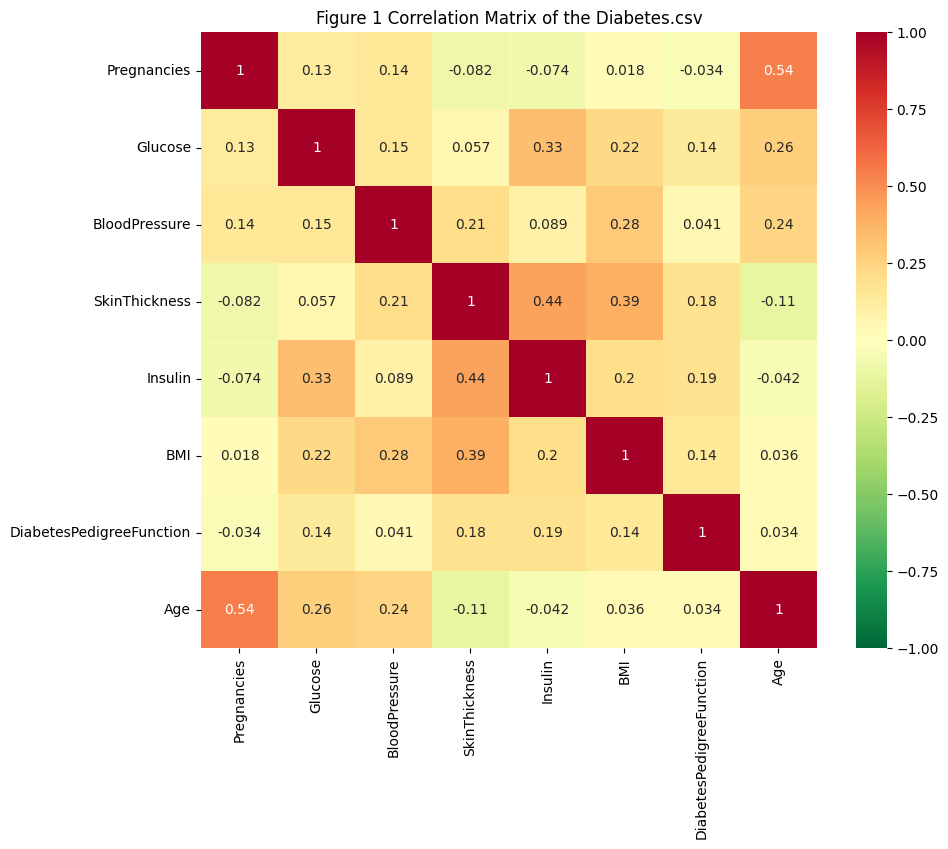

In [51]:
X = diabetes_df.drop(columns=['Outcome'])

# correlation matrix 
# Source: https://data.compass.lighthouselabs.ca/p/7/6603399c-6f1e-44e7-8163-75e126ac95c0
# Source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
corrmat = X.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square=True,cmap="RdYlGn_r", annot=True, vmin=-1, vmax=1)
title = "Figure 1 Correlation Matrix of the Diabetes.csv"
plt.title(title)

# Save the visualization
plt.savefig(f'../visualizations/{title}.png')


### Part 1c Answer
    Multicollinearity Assessment
    
    Source: Table 1 (medicine column) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/
    
    Age and Pregnancies have the highest correlation at 0.54 -> fair in strength.
    Insulin and Skin Thickness at 0.44 -> fair in strength
    BMI and Skin Thickness at 0.39 -> fair in strength
    Insulin and Glucose at 0.33 -> fair in strength

    I interpret that there is no strong multicollinearity.  Therefore, no columns need be removed from the model.


## Part 1d: What is the distribution of each predictor variable?

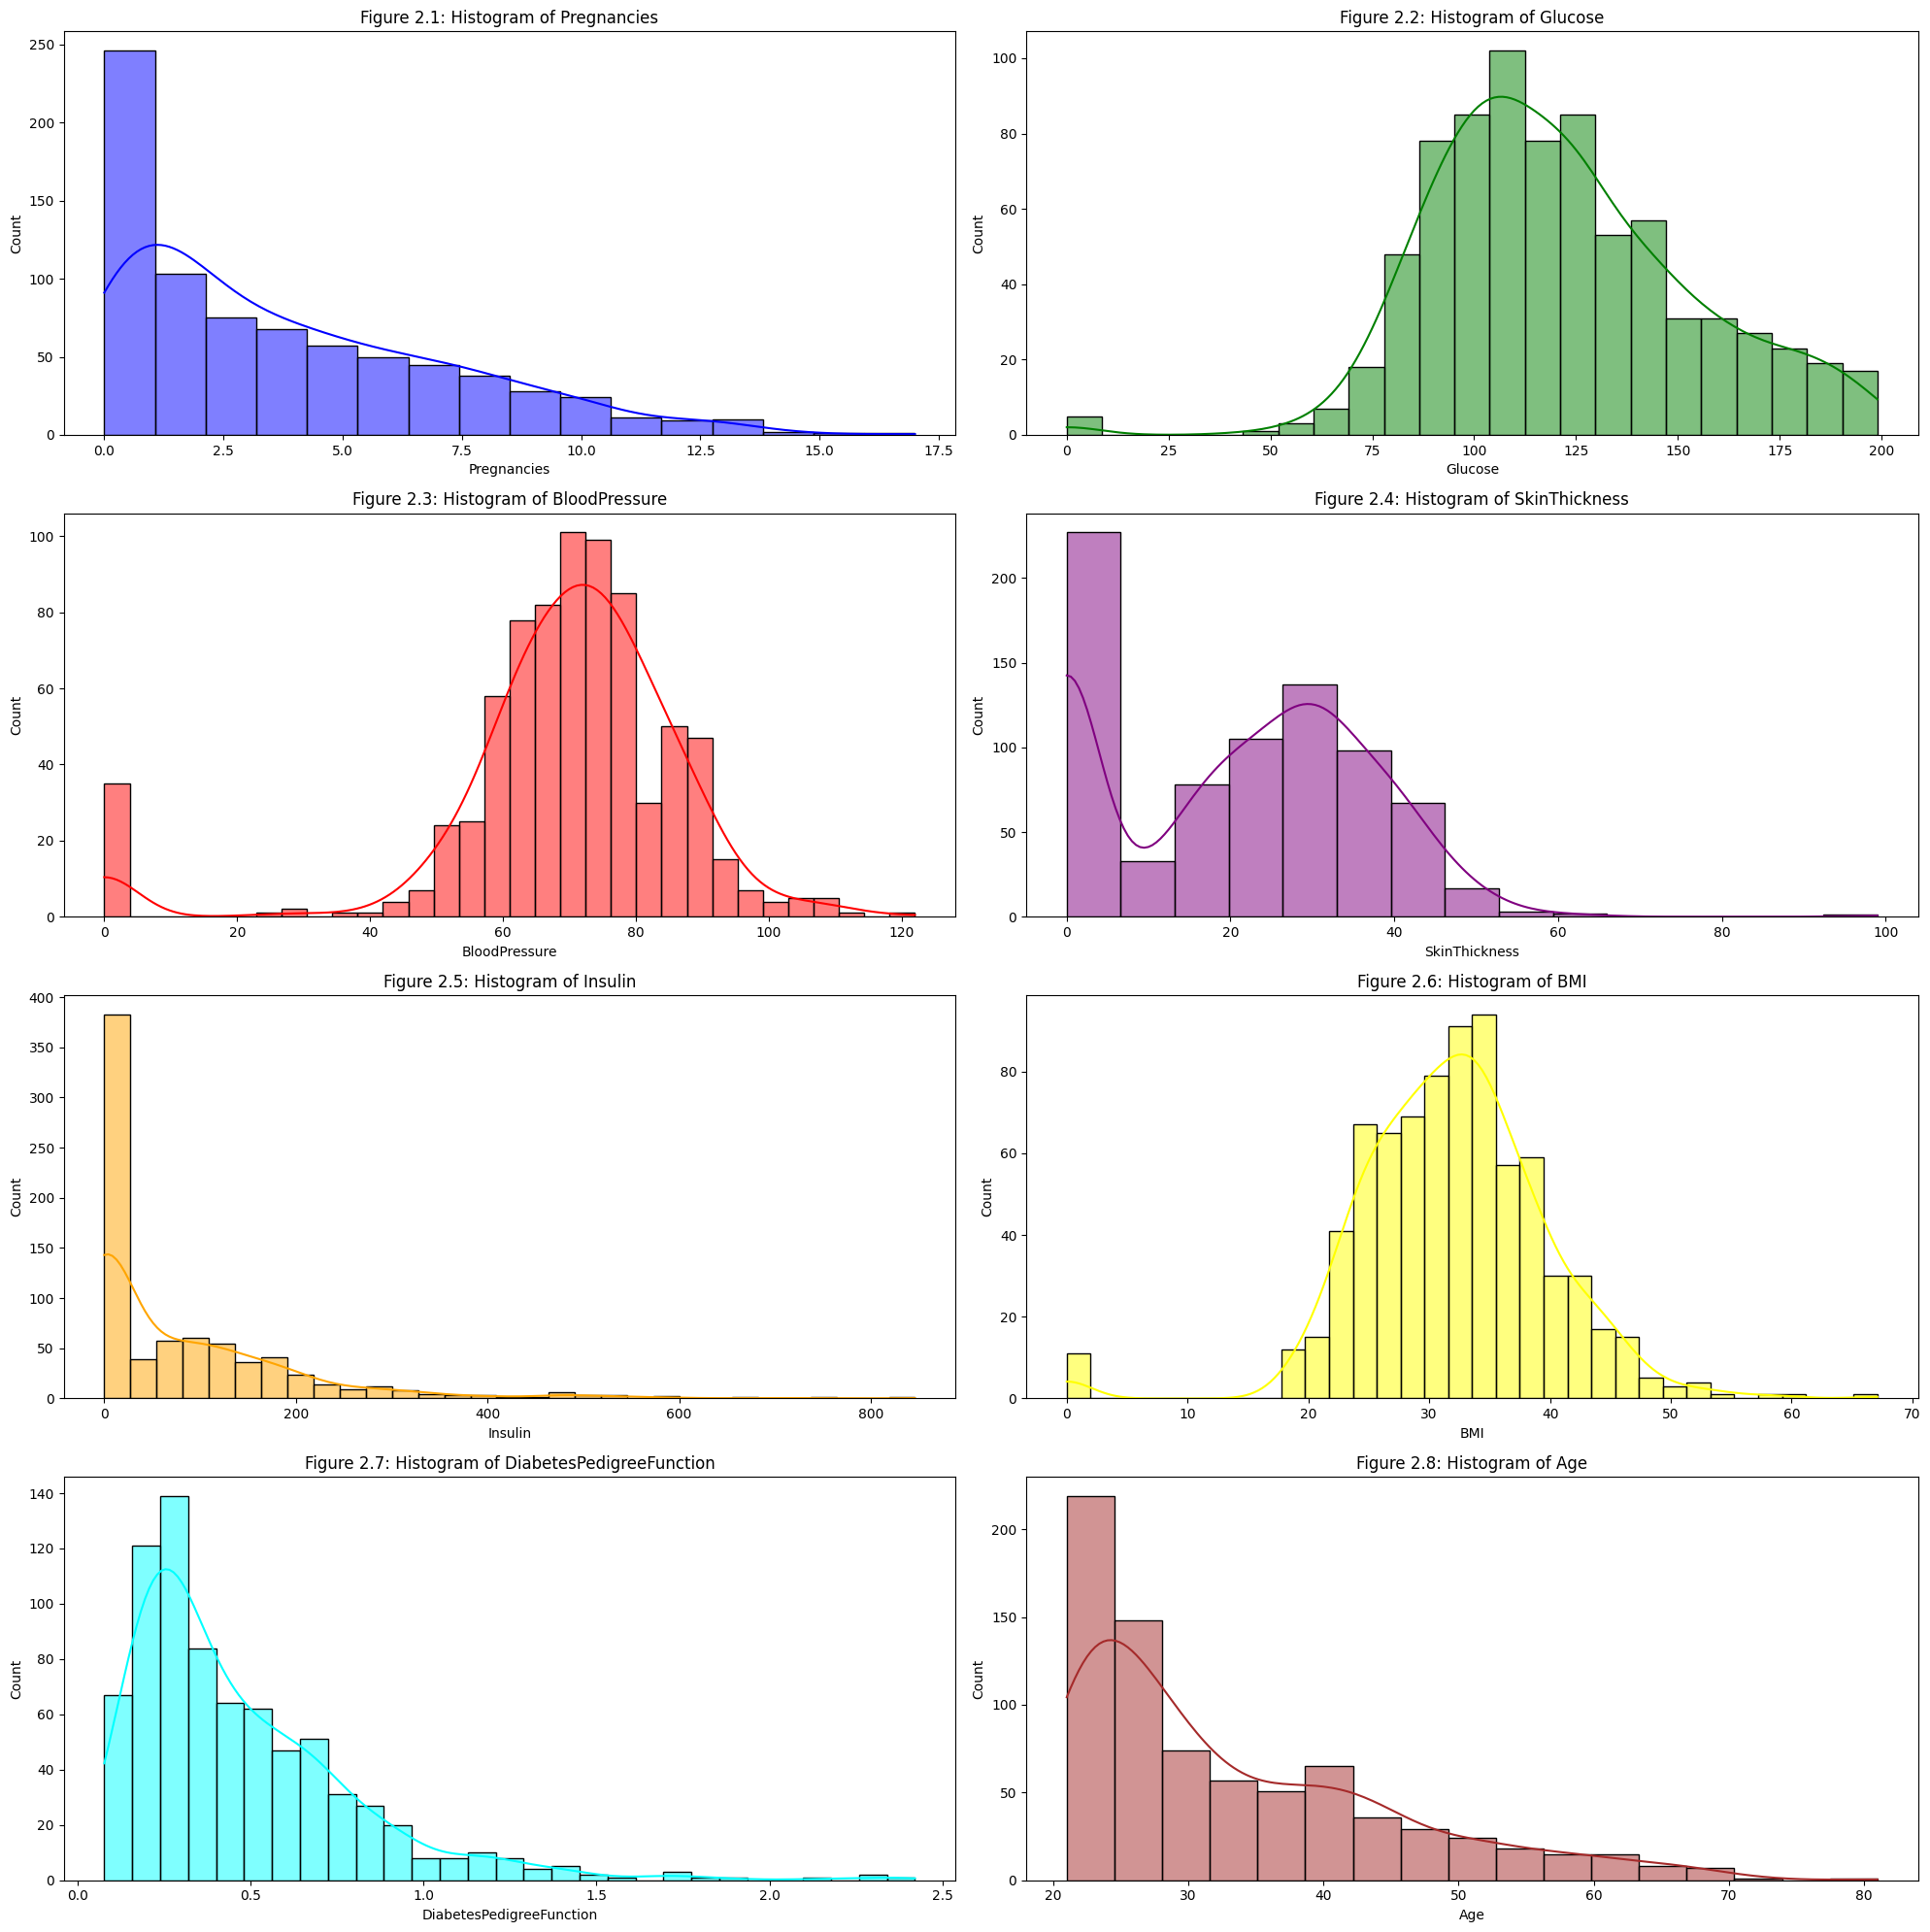

In [52]:
from cycler import cycler
import itertools

# Create a list of column names
X_columns = X.columns.to_list()

# Create a Cycler for colors
colors = cycler('color', ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'brown'])

# Create an iterator to cycle through the colors
color_iterator = itertools.cycle(colors)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Flatten the axes for iteration
axes = axes.flatten()

# Loop through column names and create histograms
for i, column in enumerate(X_columns):
    sns.histplot(X[column], kde=True, ax=axes[i], color = next(color_iterator)['color'])
    axes[i].set_title(f"Figure 2.{i+1}: Histogram of {column}")
    axes[i].set_xlabel(column)

# Adjust layout and show
plt.tight_layout()

# Save the visualization
plt.savefig(f'../visualizations/Figure 2 Histograms of diabetes.csv.png')

# Show the plots
plt.show()

### Part 1d Answers
    Pregnancies -> right Skewed
    Glucose -> Gaussian
    Blood Pressure -> Gaussian (must remove 0 values)
    BMI-> Gaussian (must remove 0 values)
    Skin Thickness-> normal with the exception of 0, which is a large amount 200+ of the dataset.
    Insulin ->
    Diabetes Pedigree Function -> Right Skewed
    Age -> Right Skewed

## Part 1e: Predictor Variable Analysis:

### Are there any outliers in the predictor variables?
    In addition to the zero values found during Part 1a and looking at the histograms above, most attributes have outliers at the extremes of their skewness.  This will be dealt with the IQR formula in Part II.

### How are the predictor variables related to each other?

    Based on what was said in the description of the predictor variables to the outcome variable, each of the predictor variables that showed a fair strength of correlation make sense to do so logically.  As each body is different, the relationship between the values is conceptual, not fixed to unit of measurement e.g. Age and Pregnancies makes sense with older people having more children, but there is no fixed age that some one has their first or 17th baby.

### Is there any interaction effect between the predictor variables?

    Age and Pregnancies have the highest correlation at 0.54 -> fair in strength.
    Insulin and Skin Thickness at 0.44 -> fair in strength
    BMI and Skin Thickness at 0.39 -> fair in strength
    Insulin and Glucose at 0.33 -> fair in strength

### Are there any differences in the predictor variables between males and females (if gender information is available)?
    Not specifically to male and females in my research, but yes, males cannot be pregnant.  It would be between those who have been pregnant and those who haven't, and even with those who are/have been pregnant, we do not have the data that specifies whether they have/had gestational diabetes at the time of pregnancy, which is a contributor/predictor for type 2 diabetes in the future.





## Part 1f: Specific Averages:

In [53]:
# What is the average age of the individuals in the dataset?
diabetes_df_age_mean = diabetes_df['Age'].mean()
print(f"The average age of the individuals in the dataset is {diabetes_df_age_mean}")

# What is the average glucose level for individuals with diabetes and without diabetes?
diabetes_df_outcome_0_glucose_mean = diabetes_df_outcome_0['Glucose'].mean()
print(f"The average glucose level of the individuals without diabetes {diabetes_df_outcome_0_glucose_mean}")

# What is the average BMI for individuals with diabetes and without diabetes?
diabetes_df_outcome_1_glucose_mean = diabetes_df_outcome_1['Glucose'].mean()
print(f"The average glucose level of the individuals with diabetes {diabetes_df_outcome_1_glucose_mean}")

The average age of the individuals in the dataset is 33.240885416666664
The average glucose level of the individuals without diabetes 109.98
The average glucose level of the individuals with diabetes 141.25746268656715


## Part 1g: How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

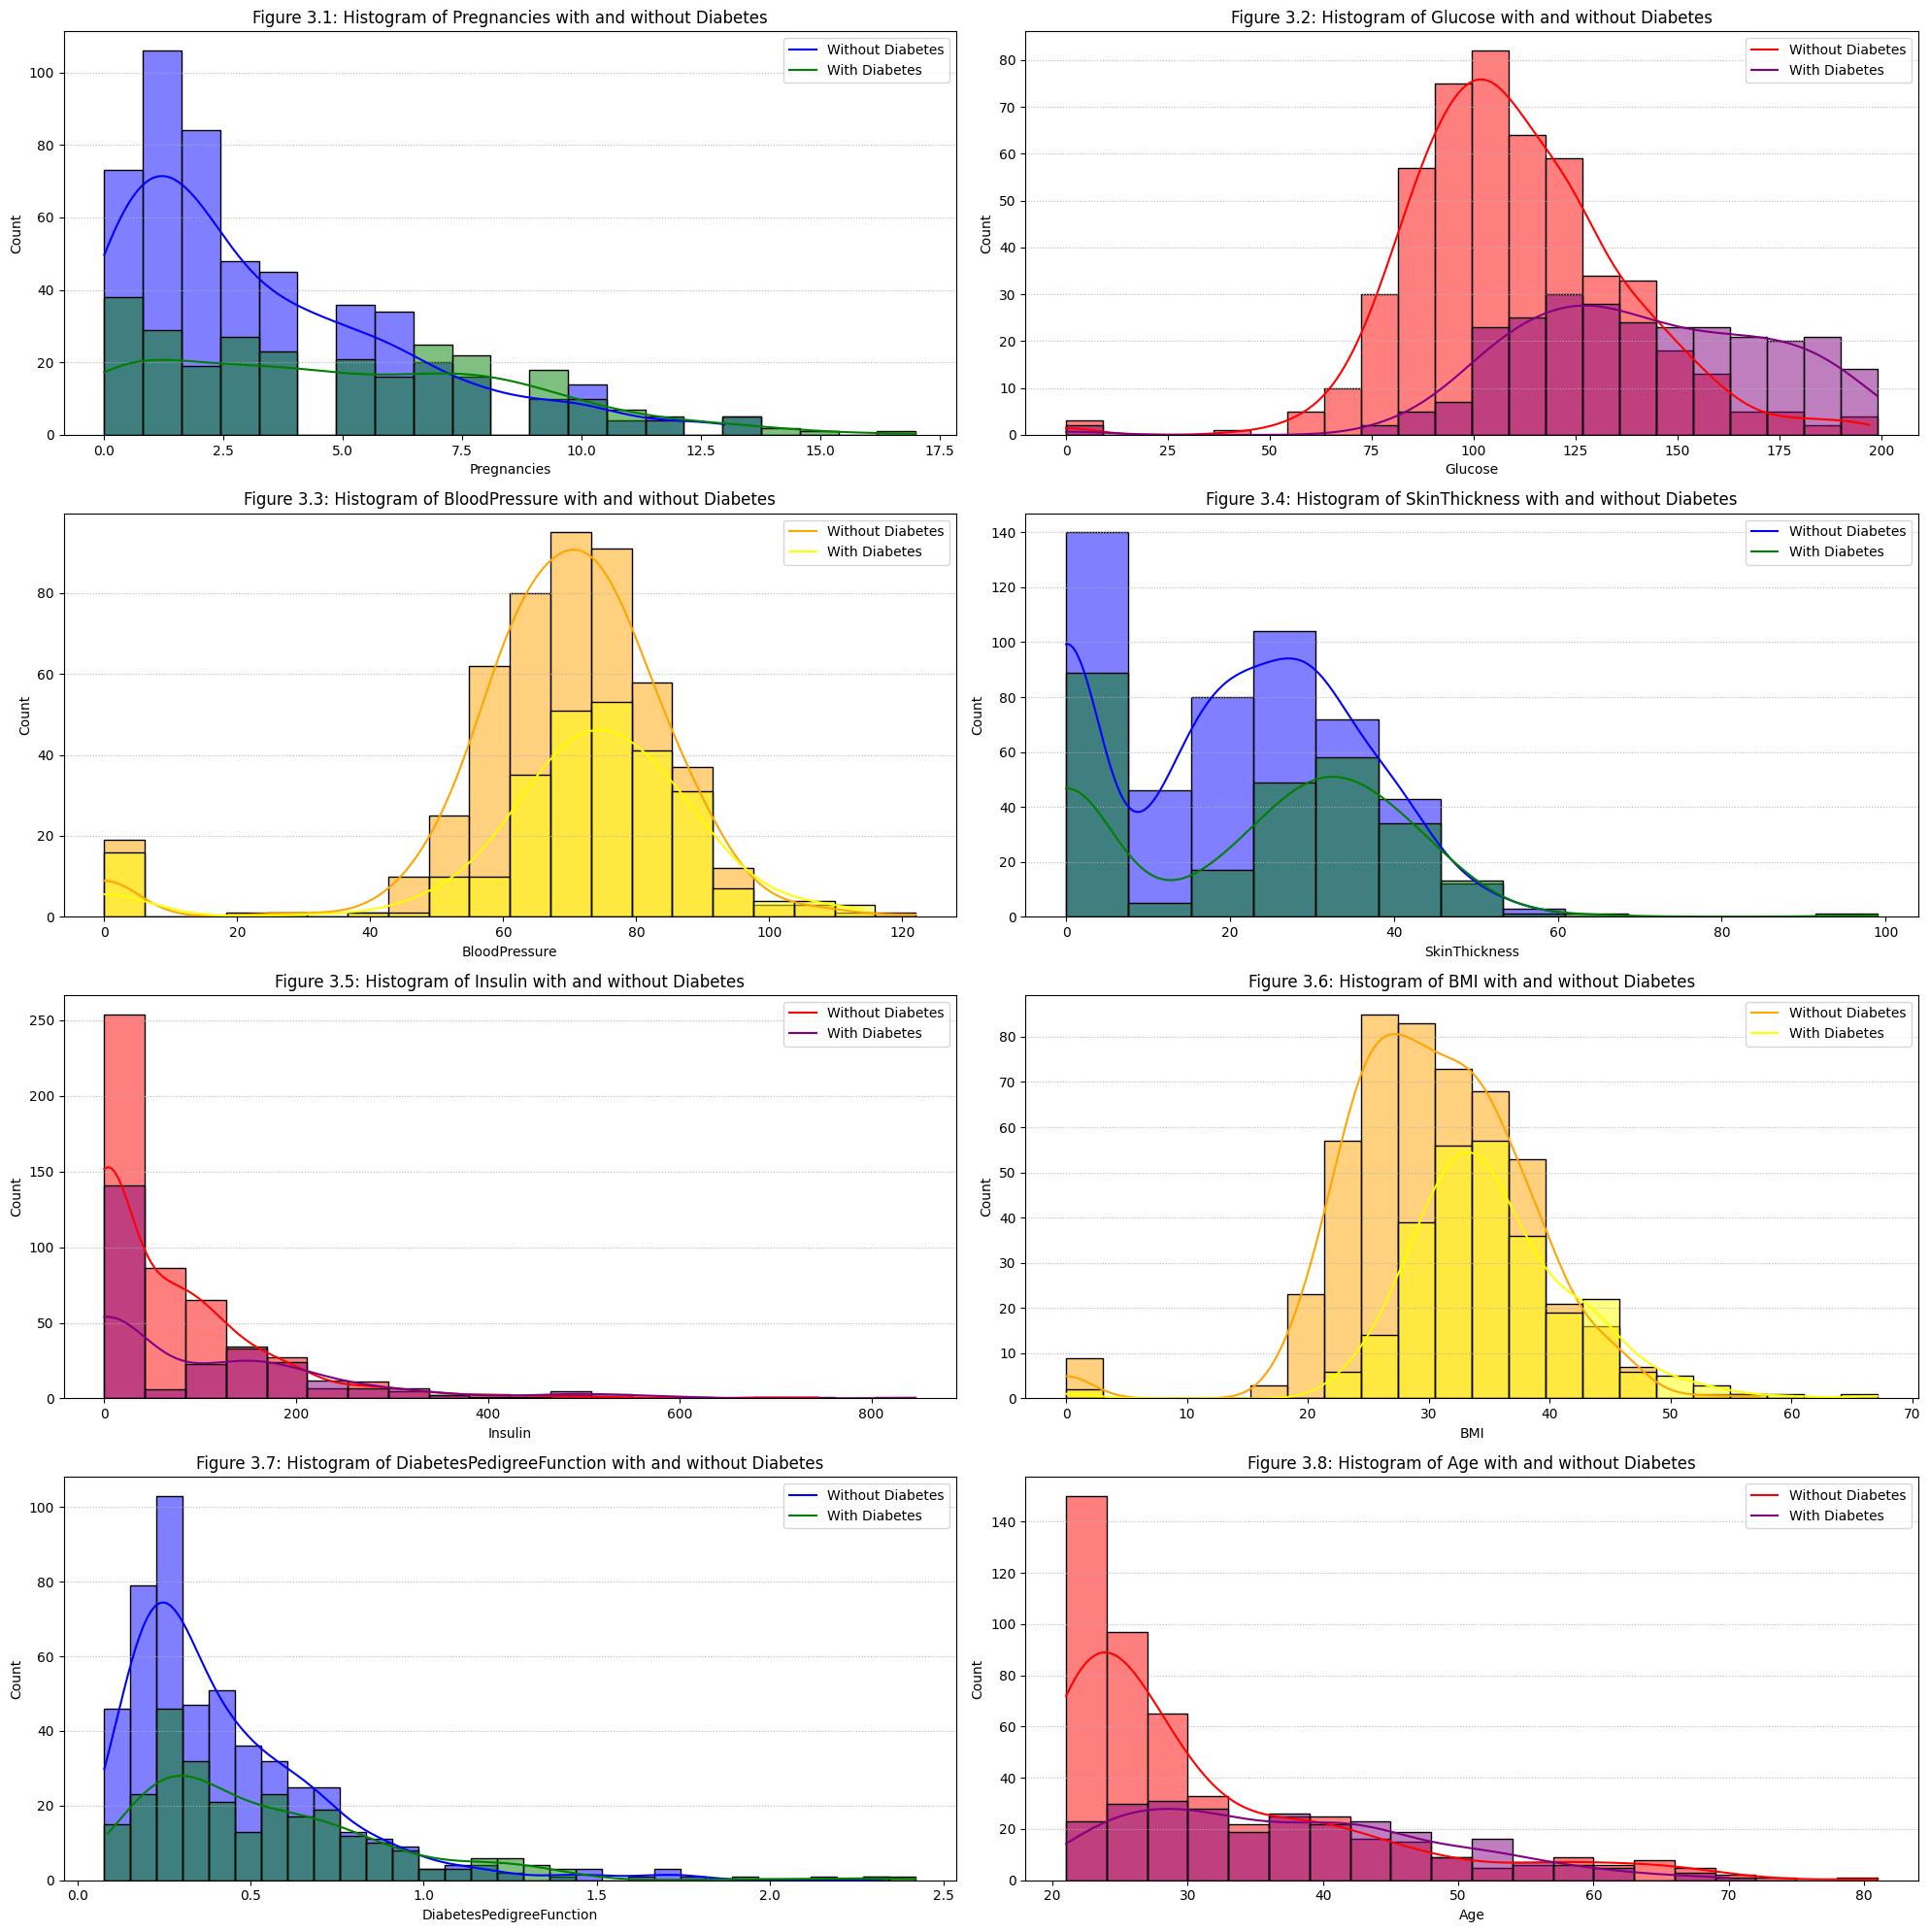

In [54]:
from cycler import cycler
import itertools

# Create a Cycler for colors
colors = cycler('color', ['blue', 'green', 'red', 'purple', 'orange', 'yellow'])

# Create an iterator to cycle through the colors
color_iterator = itertools.cycle(colors)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Flatten the axes for iteration
axes = axes.flatten()

# Loop through column names and create histograms
for i, (column1, column2) in enumerate(zip(diabetes_df_outcome_0.columns, diabetes_df_outcome_1.columns)):
    
    # Calculate min and max values between the two dataframes
    min_value = min(diabetes_df_outcome_0[column1].min(), diabetes_df_outcome_1[column2].min())
    max_value = max(diabetes_df_outcome_0[column1].max(), diabetes_df_outcome_1[column2].max())

    # Calculate IQR for the two dataframes
    iqr1 = np.percentile(diabetes_df_outcome_0[column1], 75) - np.percentile(diabetes_df_outcome_1[column1], 25)
    iqr2 = np.percentile(diabetes_df_outcome_0[column2], 75) - np.percentile(diabetes_df_outcome_1[column2], 25)
    max_iqr = max(iqr1, iqr2)

    # Calculate the bin width using the Freedman-Diaconis rule
    n = len(diabetes_df_outcome_0)
    bin_width1 = 2 * max_iqr / np.power(n, 1/3)
    
    # Calculate the bin width using a maximumm of 20 bins
    bin_width2 = int((max_value - min_value) / 20)

    # If there are too many bins with the Freedman-Diaconis rule, use 20 bins instead
    bin_width = max(bin_width1, bin_width2)

    # bin_width = max_value/10
    binrange = (min_value, max_value)

    # Set Labels
    label1 = 'Without Diabetes'
    label2 = 'With Diabetes'

    # Plot Both
    sns.histplot(diabetes_df_outcome_0[column1], kde=True, ax=axes[i], color = next(color_iterator)['color'], label=label1, binwidth = bin_width, binrange=binrange)
    sns.histplot(diabetes_df_outcome_1[column2], kde=True, ax=axes[i], color = next(color_iterator)['color'], label=label2, binwidth = bin_width, binrange=binrange)
    axes[i].set_title(f"Figure 3.{i+1}: Histogram of {column1} with and without Diabetes")
    axes[i].set_xlabel(column1)

    # Add grid dotted lines for Y-axis
    axes[i].yaxis.grid(True, linestyle=':', alpha=0.9)
    axes[i].legend([label1, label2])

# Adjust layout and show
plt.tight_layout()

# Save the visualization
plt.savefig(f'../visualizations/Figure 3 Histograms by outcome for diabetes.csv.png')

# Show the plots
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Part IIa: Handling missing values
- Part IIb: Handling outliers
- Part IIc: Scaling and normalization
- Part IId: Feature Engineering & Handling imbalanced data

## Part IIa: Handling missing values
    No null values
    Determine a value to impute for BMI, Blood Pressure, and Skin Thickness


In [55]:
# Create Empty Dictionary of values
missing_values_columns_metrics_dictionary = {}

def MetricsMeanMedian (dataframe, bool_stratify_column, column_metrics_list):
    ''' Function: calculate the mean and median based on the stratified boolean column.'''
    # Stratify Dataframe
    dataframe_0 = dataframe[dataframe[bool_stratify_column]==0]
    dataframe_1 = dataframe[dataframe[bool_stratify_column]==1]
    
    for column in column_metrics_list:

        # Filter out zeros
        dataframe_0_no_zeros= dataframe_0[dataframe_0[column]>0]
        dataframe_1_no_zeros= dataframe_1[dataframe_1[column]>0]

        # Compute Metrics and Store in Dictionary
        missing_values_columns_metrics_dictionary[f'mean_{column}_0'] = int(dataframe_0_no_zeros[column].mean())
        missing_values_columns_metrics_dictionary[f'mean_{column}_1'] = int(dataframe_1_no_zeros[column].mean())
        missing_values_columns_metrics_dictionary[f'median_{column}_0'] = int(dataframe_0_no_zeros[column].median())
        missing_values_columns_metrics_dictionary[f'median_{column}_1'] = int(dataframe_1_no_zeros[column].median())

# list of columns to impute values into
missing_values_columns_list = ['BMI', 'BloodPressure', 'SkinThickness']

# Call the Function
MetricsMeanMedian(diabetes_df, 'Outcome', missing_values_columns_list)

# Print the metrics
for item in missing_values_columns_metrics_dictionary.items():
    print(item)


('mean_BMI_0', 30)
('mean_BMI_1', 35)
('median_BMI_0', 30)
('median_BMI_1', 34)
('mean_BloodPressure_0', 70)
('mean_BloodPressure_1', 75)
('median_BloodPressure_0', 70)
('median_BloodPressure_1', 74)
('mean_SkinThickness_0', 27)
('mean_SkinThickness_1', 33)
('median_SkinThickness_0', 27)
('median_SkinThickness_1', 32)


    Because the data still contains outliers we can see that for most instances that the median is lower than the mean within each stratified column (because of right skewed data).  Therefore, I will impute the medians by the stratified outcome

In [56]:
# Stage the data
diabetes_df_no_nulls = diabetes_df.copy()

def ImputeValues (bool_stratify_column, column_metrics_list, metric_dict, metric_to_use):
    
    """This Function inmputes the values by column and metric chosen, must be done afer MetricMeanMedian Function is called"""

    # Count the number of changes
    impute_counter = 0

    for column in column_metrics_list:

        for index, row in diabetes_df_no_nulls.iterrows():
        
            if row[bool_stratify_column]==0 and int(row[column])==0:
                
                diabetes_df_no_nulls.at[index, column] = metric_dict[f'{metric_to_use}_{column}_0']
                impute_counter += 1

            if row[bool_stratify_column]==1 and int(row[column])==0:
                
                diabetes_df_no_nulls.at[index, column] = metric_dict[f'{metric_to_use}_{column}_1']
                impute_counter += 1
    
    return (print(f'{impute_counter} values were imputed.'))
    
# Call the function
ImputeValues('Outcome', missing_values_columns_list, missing_values_columns_metrics_dictionary, 'median')

# Validate to see if the values have changed
print(f'\n')
print(f"Min values before ImputeValues function \n{diabetes_df[missing_values_columns_list].min()}")
print(f'\n')
print(f"Min values after ImputeValues function \n{diabetes_df_no_nulls[missing_values_columns_list].min()}")


273 values were imputed.


Min values before ImputeValues function 
BMI              0.0
BloodPressure    0.0
SkinThickness    0.0
dtype: float64


Min values after ImputeValues function 
BMI              18.2
BloodPressure    24.0
SkinThickness     7.0
dtype: float64


## Part IIb: Handling outliers
    For this, I'll be using the statistical outlier detection of quartile plus/minus 1.5*IQR

In [57]:
# Stage clean dataframes of the data
diabetes_df_no_outliers = diabetes_df_no_nulls

# Dictionary of count of outliers removed 
num_outliers_removed = {}

def outliers (column_name): 
    """
    Function to remove outliers
    """
    global diabetes_df_no_outliers

    # Establish Outlier Measurements
    Q1 = diabetes_df_no_outliers[column_name].quantile(0.25)
    Q3 = diabetes_df_no_outliers[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove Outliers from Clean Dataframe
    diabetes_df_no_outliers = diabetes_df_no_outliers[(diabetes_df_no_outliers[column_name] >= lower_bound) & (diabetes_df_no_outliers[column_name] <= upper_bound)]

    # Print the number of outliers removed
    num_outliers_removed[column_name] =  len(diabetes_df_no_nulls) - len(diabetes_df_no_nulls[(diabetes_df_no_nulls[column_name] >= lower_bound) & (diabetes_df_no_nulls[column_name] <= upper_bound)])
    print(f"{num_outliers_removed[column_name]} outliers of {len(diabetes_df_no_nulls)} records removed from the {column_name} column")

# Run the outlier removal functions
for i in X_columns:
    outliers(i)

print(f"A total of {len(diabetes_df_no_nulls) - len(diabetes_df_no_outliers)} of {len(diabetes_df_no_nulls)} records were removed, {len(diabetes_df_no_outliers)} remaining")

4 outliers of 768 records removed from the Pregnancies column
5 outliers of 768 records removed from the Glucose column
14 outliers of 768 records removed from the BloodPressure column
87 outliers of 768 records removed from the SkinThickness column
37 outliers of 768 records removed from the Insulin column
14 outliers of 768 records removed from the BMI column
35 outliers of 768 records removed from the DiabetesPedigreeFunction column
9 outliers of 768 records removed from the Age column
A total of 180 of 768 records were removed, 588 remaining


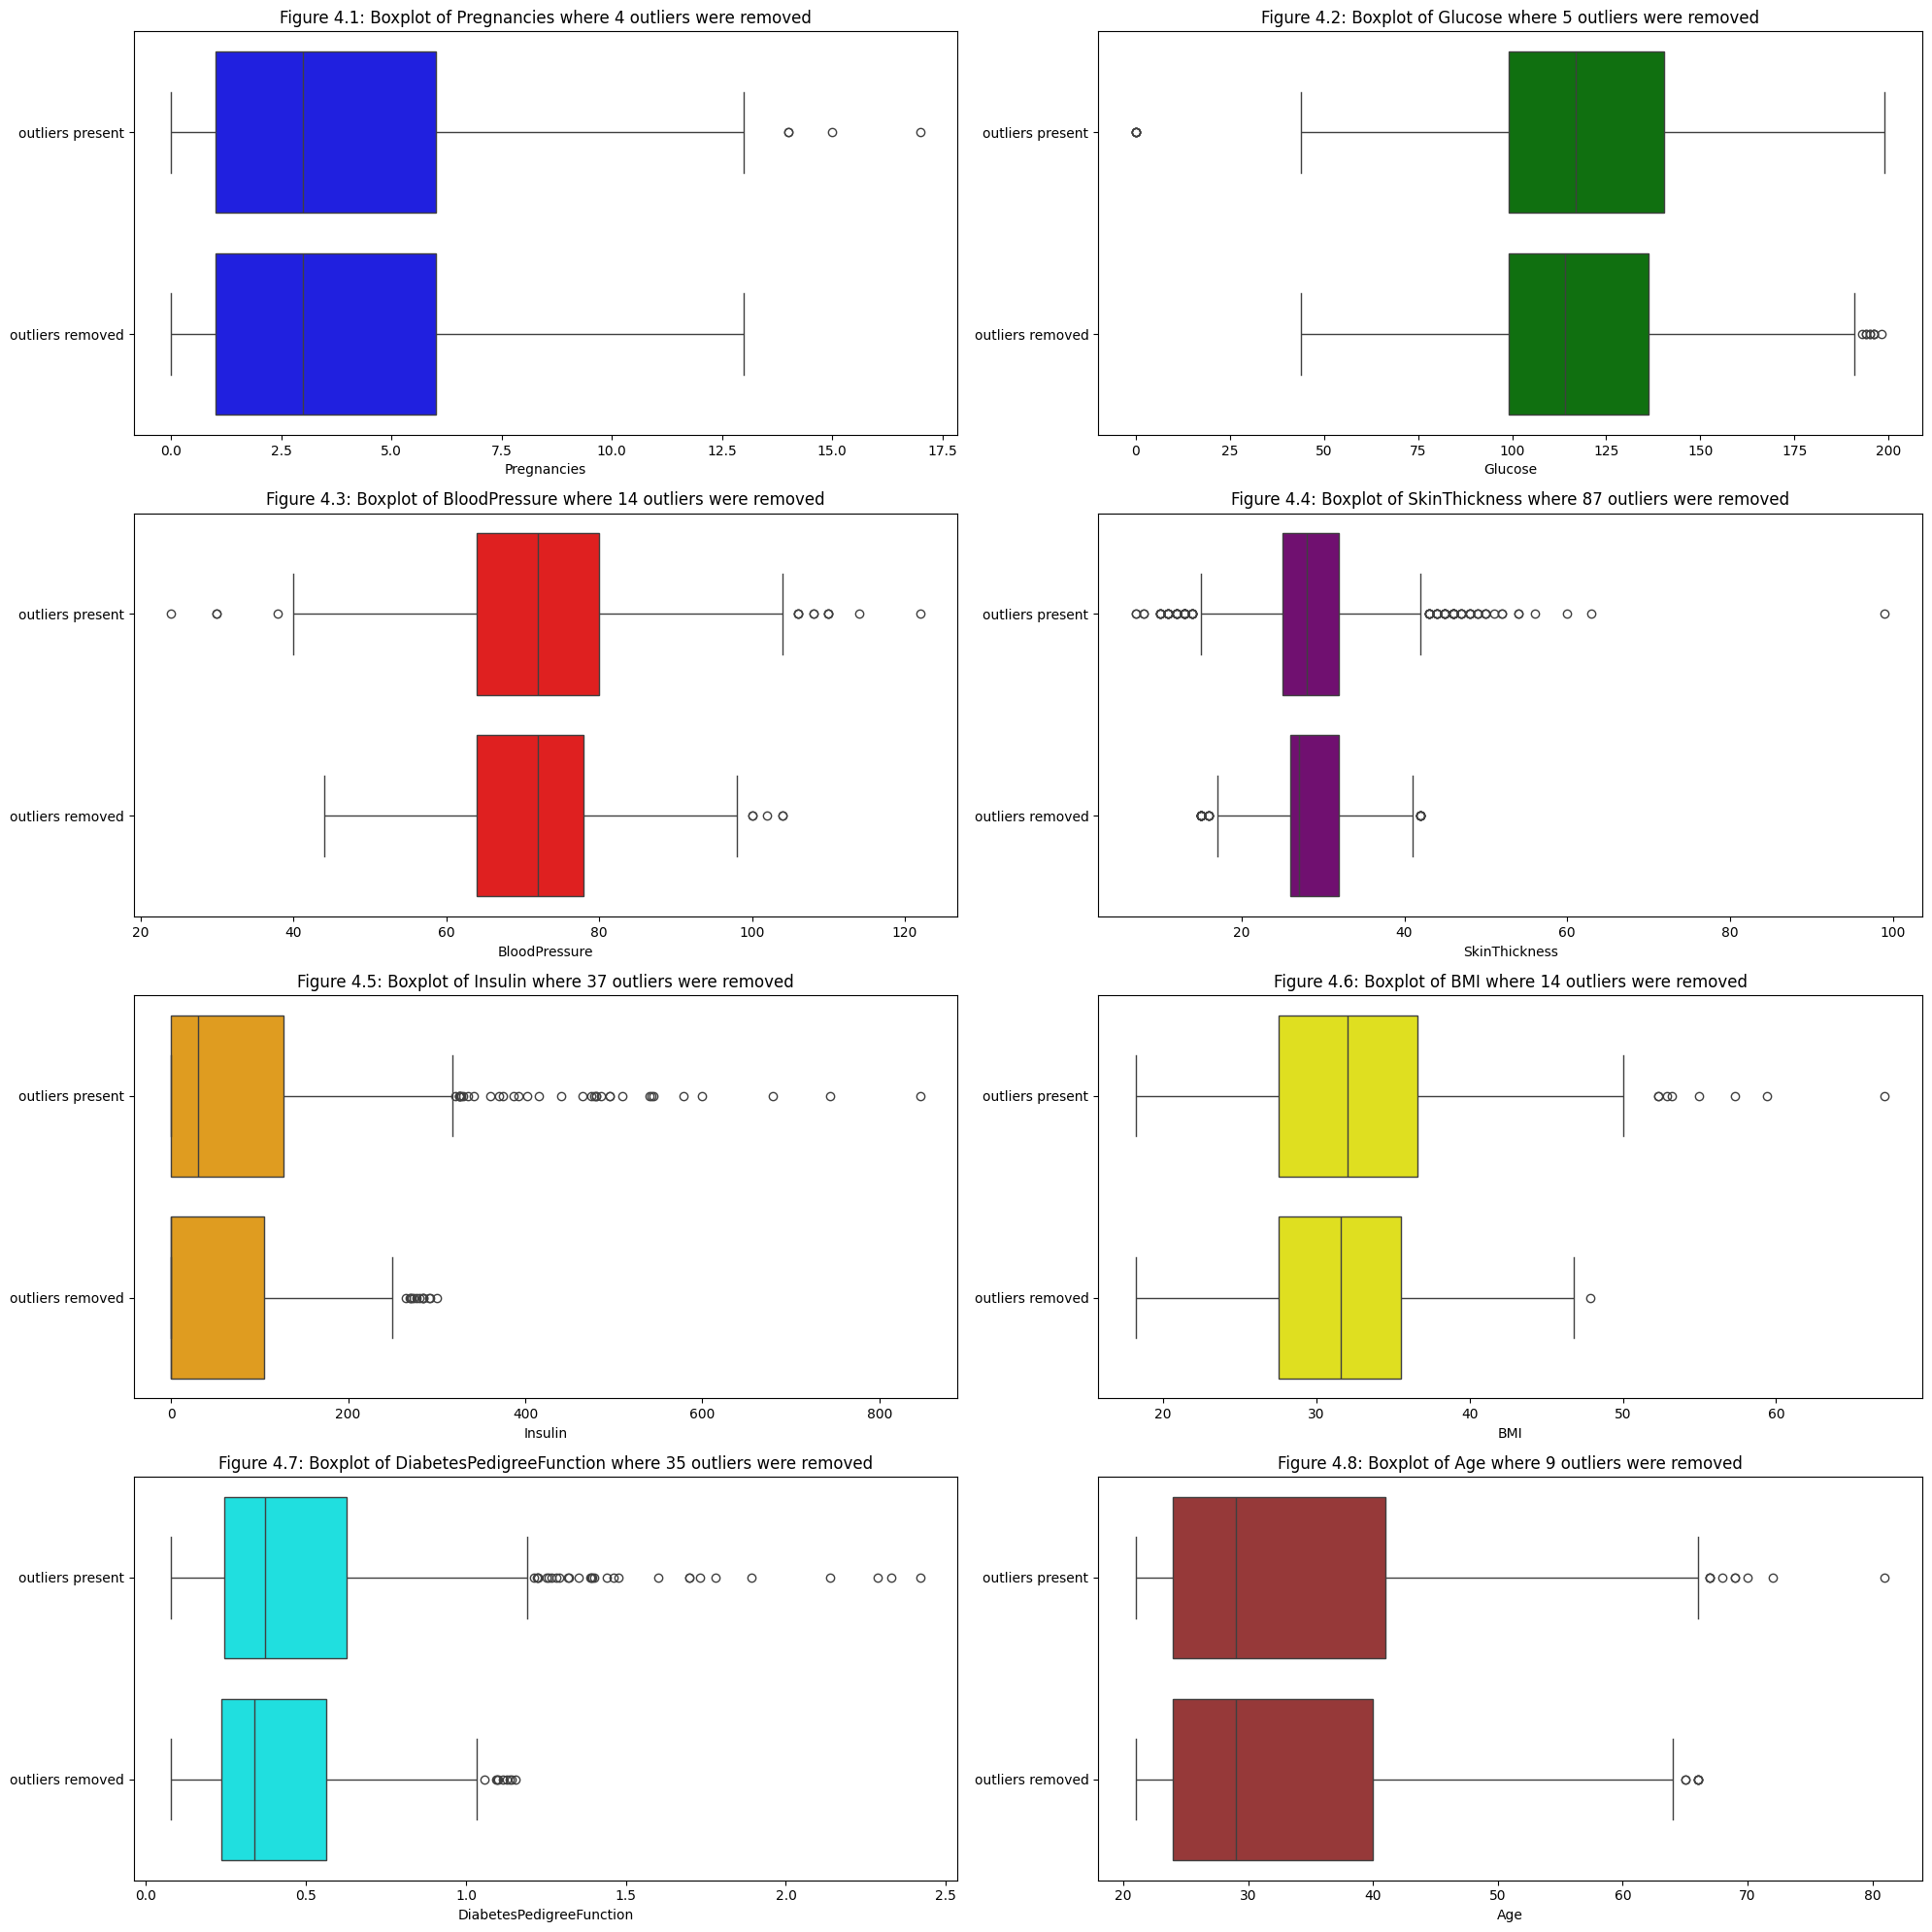

In [58]:
from cycler import cycler
import itertools

# Stage X Predictor Data
X_columns_diabetes_df_no_nulls = diabetes_df_no_nulls.drop(columns = 'Outcome')
X_columns_diabetes_df_no_outliers = diabetes_df_no_outliers.drop(columns = 'Outcome')

# Create a list of column names
X_columns = X.columns.to_list()

# Create a Cycler for colors
colors = cycler('color', ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'brown'])

# Create an iterator to cycle through the colors
color_iterator = itertools.cycle(colors)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Flatten the axes for iteration
axes = axes.flatten()

# Loop through column names and create histograms
for i, (column1, column2) in enumerate(zip(X_columns_diabetes_df_no_nulls.columns, X_columns_diabetes_df_no_outliers.columns)):

    boxplot_data = {'outliers present': X_columns_diabetes_df_no_nulls[column1],
                    'outliers removed': diabetes_df_no_outliers[column2]}

    sns.boxplot(boxplot_data, ax=axes[i], color = next(color_iterator)['color'], orient='y')
    axes[i].set_title(f"Figure 4.{i+1}: Boxplot of {column1} where {num_outliers_removed[column1]} outliers were removed")
    axes[i].set_xlabel(column1)

# Adjust layout and show
plt.tight_layout()

# Save the visualization
plt.savefig(f'../visualizations/Figure 4 Boxplots showing outlier removal for diabetes.csv.png')

# Show the plots
plt.show()

In [62]:
# Save the cleaned dataframe to Joblib
import joblib

joblib.dump(diabetes_df_no_outliers, "../data/diabetes_clean.csv")

['../data/diabetes_clean.csv']

In [63]:
# Load the cleaned dataframe to Joblib
import joblib

diabetes_clean_df = joblib.load("../data/diabetes_clean.csv")

## Part IIc: Scaling and normalization

    Source: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
    
    As most of the variables are not gaussian in distribution, I will be using normalization (Min/Max default 0 to 1) for each of the predictor variables, with the exception of age and pregnancies

##  Part IId: Feature Engineering & Handling imbalanced data

### Biases
    One issue may be were a higher number of pregnancies might result in a higher probability of having diabetes - this is not entirely true as insulin resistance may increase during pregnancy that may lead to gestational diabetes, but it is not true for all pregnancies.  Also, men cannot get pregnant, so the data is essentially between women who have/are pregnant and everyone else.  

    Additionally, once people become age 35, they are considered at risk for diabetes regardless of whether they have been tested.

### Handling imbalanced data
    The imbalance of data was rectified by using stratify when splitting the dataset, and further in Part III, it is addressed with StratifiedKFold.  

### Feature Engineering
    Considering low number of features, I will not employ a feature reduction method like PCA and instead use a feature selection method in Part III.  

    I will Feature Engineer the interaction terms, the quadratic, the reciprocal, and the log transformations of each variable and add them to the list of predictors.

    In order to correct the data for the bias in pregnancy, it will be changed to a boolean value where True = is/was pregnant.

    In order to handle the imbalance of data for the bias in age, it will be changed to a boolean value where True = over age 34 (at risk)



In [78]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import  MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split

# Class happens after ColumnTransfer 
class QuantToBool(BaseEstimator, TransformerMixin):
    """
    Takes quantitative values, 
    changes values below a threshold to 0 and above to 1
    returns a boolean column
    """
    def __init__(self, columns=None, transformation_threshold=None):
        self.X_transformtions = pd.DataFrame()
        self.transformation_threshold = transformation_threshold
        self.columns=columns 
        
    # Must include this fit, though I has NO effect
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # Copy original Dataframe
        X_transform = X.copy()

        # Check if the result is a dataframe
        if isinstance(X_transform, pd.DataFrame): 

            for column in X_transform.columns:
                
                self.X_transformtions[f"{column}_bool"] = X_transform[column].apply(lambda x: 1 if x > self.transformation_threshold[column] else 0)
                self.X_transformtions[f"{column}_bool"] = self.X_transformtions[f"{column}_bool"].astype(bool)

        # Check if the result is a series and convert to dataframe
        if isinstance(X_transform, pd.Series): 

            self.X_transformtions = pd.DataFrame({f"{X_transform.name}_bool": X_transform.apply(lambda x: 1 if x > self.transformation_threshold[X_transform.name] else 0)})
            self.X_transformtions[f"{X_transform.name}_bool"] = self.X_transformtions[f"{X_transform.name}_bool"].astype(bool)

        return self.X_transformtions
    
    def get_feature_names_out(self, input_features=None):
        return self.X_transformtions.columns

# Class happens after ColumnTransfer
class TransformtionsLogRec(BaseEstimator, TransformerMixin):
    """
    Takes quantitative values, 
    applies the log and reciprocal transformations as specififed, 
    returns transformed columns as dataframe
    """
    def __init__(self, columns=None, transformation_option=None):
        self.X_transformtions = pd.DataFrame()
        self.columns=columns 
        self.transformation_option = transformation_option
        
    # Must include this fit, though I has NO effect
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # Copy original Dataframe
        X_transform = X.copy()

        if self.transformation_option == 'log':

            #Loop through the original X Columns 
            for column in X_transform:
                
                #Apply the Log Transformation, add a very small value to make values non-zero
                self.X_transformtions[f'{column}_log'] = np.log(X_transform[column] + 1e-20)
        
        if self.transformation_option == 'rec':

            #Loop through the original X Columns 
            for column in X_transform:

                #Apply the reciprocal Transformation, add a very small value to make values non-zero
                self.X_transformtions[f'{column}_reciprocal'] = 1 / (X_transform[column] + + 1e-20)
        
        return self.X_transformtions
    
    def get_feature_names_out(self, input_features=None):
        return self.X_transformtions.columns
    
# Set the output for transformers
set_config(transform_output="pandas")

# Define the Quantitative Transformations done in parallel
transformation_quant_union = FeatureUnion([

    ('Polynomial', PolynomialFeatures(2, # number of degrees, where 2 is the quadratic level
                                      include_bias=False # remove the "1"
    )),
    ('Logarithm', TransformtionsLogRec(transformation_option='log')),
    ('Reciprocal', TransformtionsLogRec(transformation_option='rec'))

])

# the Quaititative Preprocessing Pipeline
pipeline_quant_transformation = Pipeline([
    ("Quantitative Transformtions", transformation_quant_union),
    ("Min Max Scaler", MinMaxScaler())
])

# define the columns for the following ColumnTransformer
X_quant_columns_list = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]
X_quant_to_bool_columns_list = ['Pregnancies', "Age"]

# Set the threshold at which to differentiate between 
X_quant_to_bool_columns_transformation_threshold_dict = {'Pregnancies': 0 # divides between never pregnant (False) and at least 1 pregnant (True)
                                                         , 'Age': 34} # divides between 35 and up as True as this is the age for "At Risk"

preprocessing_transformer = ColumnTransformer(
    (
        ("Quant-to-Bool Column", QuantToBool(transformation_threshold = X_quant_to_bool_columns_transformation_threshold_dict), X_quant_to_bool_columns_list),
        ('Quantitative Column', pipeline_quant_transformation, X_quant_columns_list)
    ),
    verbose_feature_names_out=False,
)

# Stage X and y
X_predictors = diabetes_clean_df.drop(columns=['Outcome'])
y_outcome = diabetes_clean_df['Outcome'].astype(bool)

# Stage quant to bool columns untransformed
X_predictors_not_processed = diabetes_clean_df[X_quant_to_bool_columns_list]

# Store the list of columns before processing
X_predictors_columns_list = X_predictors.columns.tolist()

# Fit 
X_predictors_preprocessed_df = preprocessing_transformer.fit_transform(X_predictors, y_outcome)

# List of Bool Columns
X_predictors_preprocessed_df_bool_columns_list = [column_name + '_bool' for column_name in X_quant_to_bool_columns_transformation_threshold_dict.keys()]

# Split dataframe by bool and non bool columns
X_predictors_preprocessed_df_bool = X_predictors_preprocessed_df[X_predictors_preprocessed_df_bool_columns_list]
X_predictors_preprocessed_df_no_bool = X_predictors_preprocessed_df.drop(columns = X_predictors_preprocessed_df_bool_columns_list)

# Remove the appended names from the columns
X_predictors_preprocessed_df_no_bool.columns = [column_name.split('__')[1] for column_name in X_predictors_preprocessed_df_no_bool.columns]

# Return Dataframe as a whole
X_predictors_preprocessed_df = pd.concat([X_predictors_preprocessed_df_bool, X_predictors_preprocessed_df_no_bool],axis=1 )

# Merge into 1 clean dataframe
diabetes_preprocessed_df = pd.concat([X_predictors_not_processed, X_predictors_preprocessed_df, y_outcome],axis =1)

# Show the preprocessing steps
set_config(display='diagram')
display(preprocessing_transformer)

# Print the new list of columns and types
print(diabetes_preprocessed_df.info())


ColumnTransformer(transformers=(('Quant-to-Bool Column',
                                 QuantToBool(transformation_threshold={'Age': 34,
                                                                       'Pregnancies': 0}),
                                 ['Pregnancies', 'Age']),
                                ('Quantitative Column',
                                 Pipeline(steps=[('Quantitative Transformtions',
                                                  FeatureUnion(transformer_list=[('Polynomial',
                                                                                  PolynomialFeatures(include_bias=False)),
                                                                                 ('Logarithm',
                                                                                  TransformtionsLogRec(transformation_option='log')),
                                                                                 ('Reciprocal',
                                                                                  TransformtionsLogRec(transformation_option='rec'))])),
                                                 ('Min Max Scaler',
                                                  MinMaxScaler())]),
                                 ['Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI',
                                  'DiabetesPedigreeFunction'])),
                  verbose_feature_names_out=False)

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 0 to 767
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Pregnancies                             588 non-null    int64  
 1   Age                                     588 non-null    int64  
 2   Pregnancies_bool                        588 non-null    bool   
 3   Age_bool                                588 non-null    bool   
 4   Glucose                                 588 non-null    float64
 5   BloodPressure                           588 non-null    float64
 6   SkinThickness                           588 non-null    float64
 7   Insulin                                 588 non-null    float64
 8   BMI                                     588 non-null    float64
 9   DiabetesPedigreeFunction                588 non-null    float64
 10  Glucose^2                               588 non-null    float64
 11

In [79]:
# Save the preprocessed dataframe to Joblib
import joblib

joblib.dump(diabetes_preprocessed_df, "../data/diabetes_preprocessed.csv")


['../data/diabetes_preprocessed.csv']

In [80]:
# Load the preprocessed data
import joblib

diabetes_preprocessed_df_load = joblib.load("../data/diabetes_preprocessed.csv")

# Seperate Predictor and Outcome variables
X_predictors_preprocessed_df = diabetes_preprocessed_df_load.drop(columns = ['Outcome', 'Pregnancies', 'Age'])
y_outcome = diabetes_preprocessed_df_load['Outcome']

# Prepare the data for Modelling
X_train, X_test, y_train, y_test = train_test_split(X_predictors_preprocessed_df, y_outcome, test_size=0.3, stratify=y_outcome, random_state=42)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Part IIIa Train the models: Train the selected models on the training set.
- Part IIIb Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Part IIIc Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Part IIIa Train the models: 

### Metrics Used for scoring
    Considering our data is imbalanced and it is imperative to have a high sensitivity due to the nature of medical diagnosis, the metric I will be using is a weighted sum between recall and the f1-score.  A model and the features to select will be based on this highest weighted sum. The recall will return a high rate of true positives but shouldn't be completely fixated on the records of positive cases in the training data.  Therefore, F1-score is put into the mix to balance the selection of features and models.  

### Ensemble Methods:

##### _Bagging Ensemble using Logistic Regression Model_
##### _Random Forest and Gradient Boosting Ensembles using Decision Trees_

### Modelling Definitions

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

# Scoring Value that is callable
def score_func (y, y_pred, **kwargs):  
    # Weighted sum of recall and F1-Score
    # Combined weights can be adjusted, but must be summed to 1
    model_scorer_recall_weight = 0.7
    model_scorer_f1_score_weight = 0.3
    model_scorer_recall = metrics.recall_score(y, y_pred)
    model_scorer_f1_score = metrics.f1_score(y, y_pred)
    model_scorer_score = model_scorer_recall_weight * model_scorer_recall  + model_scorer_f1_score_weight * model_scorer_f1_score
    return model_scorer_score

# Create a callable scoring function using make_scorer
recall_f_scorer = make_scorer(score_func, greater_is_better=True, needs_threshold=False)

# define the Kfold that preserves the percentage of samples
# Used in Grid Search and in Feature Selection 
cv_StratifiedKFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# This is the list of models and parameters used.  
# These will be used for the feature selection, 
# but will be modified with hypertuning after selection with GridSearchCV
model_estimators = [
    ("Log", BaggingClassifier(estimator=LogisticRegression(solver='liblinear')))
    ,('RanForEn', RandomForestClassifier()),
    ('GradBoost', GradientBoostingClassifier()),
]

# Define the parameters for hypertuning by grid search
param_grid = {

    "Log": {

        # Logistic Regression Params
        'estimator__penalty': ['l1', 'l2'],
        'estimator__C': [0.1, 1.0, 10.0],
        'bestimator__max_iter': [100, 200, 300],

        # Bagging Classifier Params
        'n_estimators': [10, 20, 30],           
        'max_samples': [0.5, 0.7, 0.9]
    },

    'RanForEn': {

        # Random Forest Classifier Params
        'RandomForestClassifier__n_estimators': [50, 100],
        'RandomForestClassifier__max_depth': [None, 10],
        'RandomForestClassifier__min_samples_split': [2, 4],
        'RandomForestClassifier__min_samples_leaf': [1, 2],
        'RandomForestClassifier__max_features': ['auto', 'sqrt']
    },
  
    'GradBoost': {
        # Gradient Boosting
        'GradientBoostingClassifier__n_estimators': [50, 100],
        'GradientBoostingClassifier__learning_rate': [0.01, 0.1],
        'GradientBoostingClassifier__max_depth': [5, 6],
        'GradientBoostingClassifier__min_samples_split': [2, 3]
    }
}

# Define the Fixed Features
fixed_features_names = [
    "Glucose", 
    "BloodPressure", 
    "SkinThickness", 
    "Insulin", 
    "BMI", 
    "DiabetesPedigreeFunction"
]

# Define the Fixed Features by column number
fixed_features_numbers_list = [X_predictors_preprocessed_df.columns.get_loc(column_name) for column_name in fixed_features_names]
fixed_features_numbers_tuple = tuple(fixed_features_numbers_list)

### Part IIIa: Selecting Features on base Estimators and Training Data

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Create Empty list to store the various pipelines
pipeline_models_list = []

# Create Empty dictionary to store the best estimators
best_estimators_models = {}
best_estimators_features = {}
best_estimators_params = {}
best_estimators_scores = {}

# Stage the data
X_best_estimators = X_train
y_best_estimators = y_train
  
# Find the best Features
for name, estimator in model_estimators:

    feature_selector= EFS(
        estimator=estimator, 
        min_features = 8,
        max_features = 16, 
        scoring=recall_f_scorer,
        fixed_features=fixed_features_numbers_tuple,
        cv=cv_StratifiedKFold
    )

    # find the best features
    feature_selector.fit_transform(X_best_estimators, y_best_estimators)

    # Store the best Features per model
    best_estimators_features[name] = feature_selector.best_feature_names_.tolist()



### Part IIIa: Save Feature Selection to Disk

In [ ]:
# Dump the the Dictionary to Joblib
import joblib

joblib.dump(best_estimators_features, "../data/best_estimators_models")


In [ ]:
# Load the the Dictionary from Joblib
import joblib

best_estimators_features_load = joblib.load("../data/best_estimators_features")

### Part IIIa: Hypertune Models

In [ ]:
# With the best features selected, apply hypertuning
for name, estimator in model_estimators:

    X_best_estimators = X_best_estimators[best_estimators_features[name]]

    # Define the Grid Search
    grid_search = GridSearchCV(
            estimator=estimator, 
            param_grid=param_grid[name], 
            cv=cv_StratifiedKFold, 
            n_jobs=-1, # Use all processors
            scoring = recall_f_scorer
    )

    # fit pipeline to grid
    grid_search.fit(X_best_estimators, y_best_estimators)

    # Store best_estimators
    best_estimators_models[name] = grid_search.best_estimator_
    best_estimators_params[name] = grid_search.best_params_
    best_estimators_scores[name] = grid_search.best_score_

### Part IIIa: Save Models to Disk

In [21]:
# Save the Dictionaries to Joblib
import joblib

joblib.dump(best_estimators_models, "../best_estimators/best_estimators_models")
joblib.dump(best_estimators_params, "../best_estimators/best_estimators_params")
joblib.dump(best_estimators_scores, "../best_estimators/best_estimators_scores")

['best_estimators_scores']

In [ ]:
# Load the Dictionaries from Joblib
import joblib

best_estimators_models_load = joblib.load("../data/best_estimators_models")
best_estimators_features_load = joblib.load("../data/best_estimators_features")
best_estimators_params_load = joblib.load("../data/best_estimators_params")
best_estimators_scores_load = joblib.load("../data/best_estimators_scores")

## Part IIIb: Compare Models

In [23]:
# #Sources:
# https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019
# https://scikit-learn.org/

from sklearn import metrics

# Empty dictionaries/lists to store metrics & info
all_models_metrics_list = []
all_models_roc_list = []

# Run each pipeline
for name, model in best_estimators_models_load.items():

    #Stage the Test data
    X_test1 = X_test[best_estimators_features_load[name]].copy()
    
    #Predict the Model
    y_pred = model.predict(X_test1)
    cm_tn, cm_fp, cm_fn, cm_tp = metrics.confusion_matrix(y_test, y_pred).ravel()

    # Store Metrics
    all_models_metrics_list.append({
        "model": name,
        'true_neg': cm_tn,
        'false_neg': cm_fn,
        'false_pos': cm_fp,
        'true_post': cm_tp,
        'accuracy': metrics.accuracy_score(y_test, y_pred), 
        'precision_score': metrics.precision_score(y_test, y_pred), 
        "recall_score": metrics.recall_score(y_test, y_pred),
        "f1_score": metrics.f1_score(y_test, y_pred)
    })
    
    # Store ROC Data
    if not name.endswith("SVC"):

        y_score = model.predict_proba(X_test)[:,1]
        roc_curve_fpr, roc_curve_tpr, roc_curve_threshold = metrics.roc_curve(y_test, y_score)

        all_models_roc_list.append((
            name, 
            roc_curve_fpr, 
            roc_curve_tpr, 
            roc_curve_threshold,
            metrics.roc_auc_score(y_test, y_score)
        ))


## Part IIIb Model evaluation: accuracy, precision, recall, F1-score, and ROC-AUC

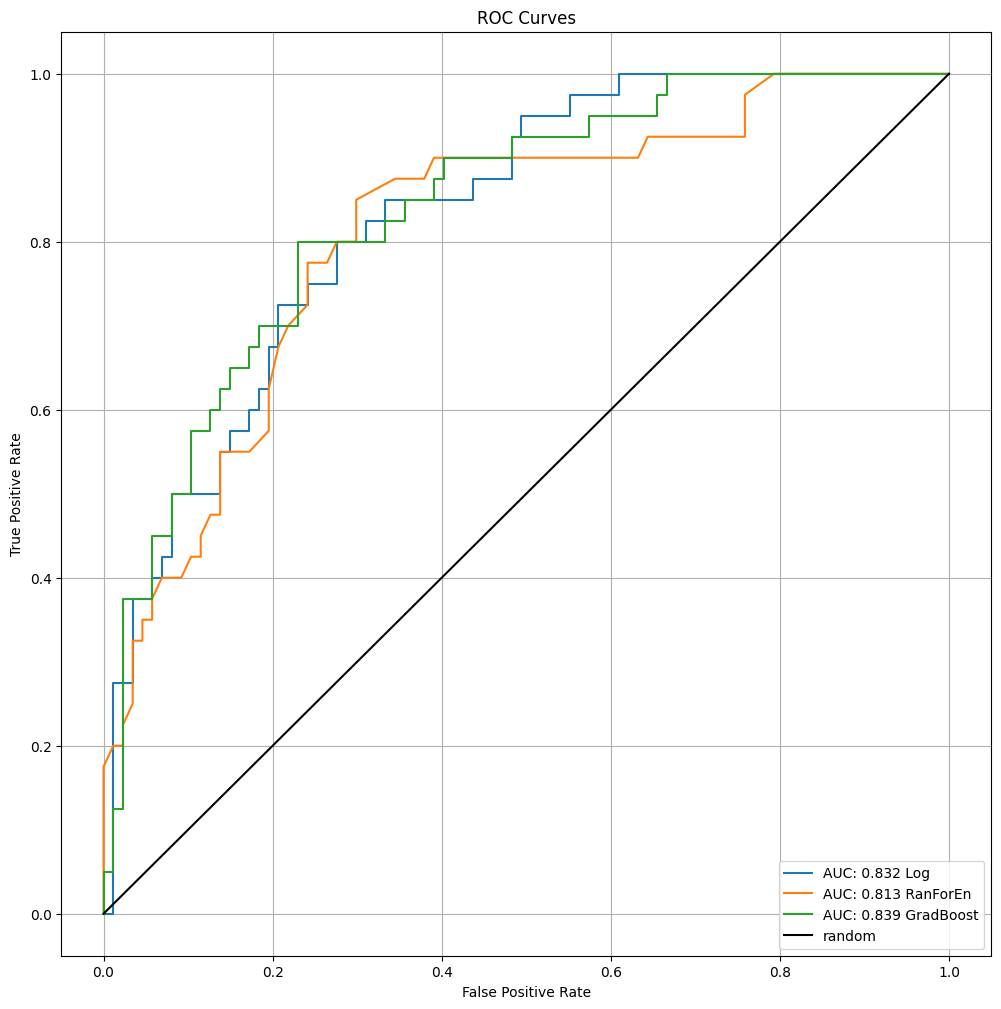

       model  true_neg  false_neg  false_pos  true_post  accuracy  \
0        Log        75         19         12         21  0.755906   
1   RanForEn        75         21         12         19  0.740157   
2  GradBoost        78         17          9         23  0.795276   
3        SVC        76         22         11         18  0.740157   
4      NuSVC        76         19         11         21  0.763780   
5  LinearSVC        76         22         11         18  0.740157   

   precision_score  recall_score  f1_score  
0         0.636364         0.525  0.575342  
1         0.612903         0.475  0.535211  
2         0.718750         0.575  0.638889  
3         0.620690         0.450  0.521739  
4         0.656250         0.525  0.583333  
5         0.620690         0.450  0.521739  


In [24]:
# Plot ROC Curves and display AUC
plt.figure(figsize=(12, 12))
for solver, fpr, tpr, threshold, auc in all_models_roc_list:
    auc = '{:.3f}'.format(auc)
    plt.plot(fpr, tpr, label=f'AUC: {auc} {solver}')
plt.plot([0,1],[0,1],'k-',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5 ROC Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Save the visualization
plt.savefig(f'../visualizations/Figure 5 ROC Curves.png')

all_models_metrics_df = pd.DataFrame(all_models_metrics_list)
print(all_models_metrics_df)

Given that we would want the highest recall score, I would be going with the Gradient Boost Model, which also has the highest F Score.




# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Considering the Histograms, glucose showed the greatest amount of change between those with and those without diabetes.
2. Hospitals and medical professionals could use this model to predict the early stages of diabetes of their current patients.
3. Data from other hospitals using the same metrics could be sourced and fed into this model to increase its predictive power.